In [1]:
# importing pandas and numpy

import pandas as pd
import numpy as np

In [2]:
# Loading the Dataframe
df = pd.read_csv(r'C:\Users\acer\Desktop\python practice\UPDATED-NLP-COURSE\TextFiles\smsspamcollection.tsv',sep = '\t')

In [3]:
# checking the first five rows of information

df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
# checking the null in the dataframe

df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
# No of observations in the dataframe
len(df)

5572

In [6]:
# unique values
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
# No.of counts of ham and spam
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
# percentage of ham and spam counts
747/(4825+747)*100

13.406317300789663

### only 13.4% are spam observations in the data

In [22]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

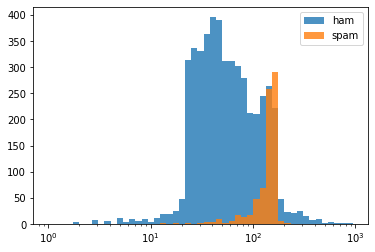

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label'] == 'ham']['length'], bins = bins, alpha = 0.8)
plt.hist(df[df['label'] == 'spam']['length'], bins = bins, alpha = 0.8)
plt.legend(('ham','spam'))
plt.show()

## Bigger Range of values is more likely to be spam

In [23]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

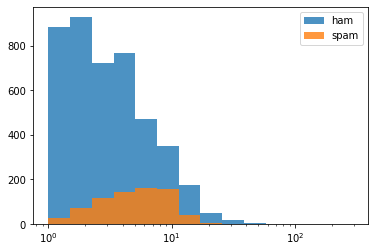

In [26]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label'] == 'ham']['punct'], bins = bins, alpha = 0.8)
plt.hist(df[df['label'] == 'spam']['punct'], bins = bins, alpha = 0.8)
plt.legend(('ham','spam'))
plt.show()

## By this data. we are not getting information to select spam or ham

In [31]:
# creating the train and test data sets

x = df[['length','punct']]
y = df['label']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

print(f'Training shape:{x_train.shape}')
print(f'Testting shape:{x_test.shape}')

Training shape:(3733, 2)
Testting shape:(1839, 2)


In [44]:
# Applying the Logistic regression for the classification

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(x_train,y_train)

# getting the Accuracy of the Model

from sklearn import metrics

# performing the prediction

predictions = lr_model.predict(x_test)

# printing the confusion matrix
print('confusion Matrix')
print(pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index = ['ham', 'spam'], columns = ['ham', 'spam']))

# printing the recall and precision 
print('\n\n')
print(' Classification Report')
print(metrics.classification_report(y_test, predictions))

# getting the accuracy of the model

print('\n')

print(f'accuracy score : {metrics.accuracy_score(y_test,predictions)}')

confusion Matrix
       ham  spam
ham   1547    46
spam   241     5



 Classification Report
              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



accuracy score : 0.843936922240348


### Here True positives are only 5 and misclassfying the 245(False positive) as ham 

### Here accuracy score is high. Still model is worse

In [45]:
# Applying the naive Bayes for the classification

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(x_train,y_train)



# performing the prediction

predictions = nb_model.predict(x_test)

# printing the confusion matrix
print('confusion Matrix')
print(pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index = ['ham', 'spam'], columns = ['ham', 'spam']))

# printing the recall and precision 
print('\n\n')
print(' Classification Report')
print(metrics.classification_report(y_test, predictions))

# getting the accuracy of the model

print('\n')

print(f'accuracy score : {metrics.accuracy_score(y_test,predictions)}')

confusion Matrix
       ham  spam
ham   1583    10
spam   246     0



 Classification Report
              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839



accuracy score : 0.8607939097335509


## Naive Baye's Model is worse than the Logistic Regression. We are classying all of the observations of spam as Ham.
## Here Recall and F1 score is Zero

In [47]:
# Applying the Support vector Machines for the classification

from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train,y_train)



# performing the prediction

predictions = svc_model.predict(x_test)

# printing the confusion matrix
print('confusion Matrix')
print(pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index = ['ham', 'spam'], columns = ['ham', 'spam']))

# printing the recall and precision 
print('\n\n')
print(' Classification Report')
print(metrics.classification_report(y_test, predictions))

# getting the accuracy of the model

print('\n')

print(f'accuracy score : {metrics.accuracy_score(y_test,predictions)}')

confusion Matrix
       ham  spam
ham   1555    38
spam   193    53



 Classification Report
              precision    recall  f1-score   support

         ham       0.89      0.98      0.93      1593
        spam       0.58      0.22      0.31       246

    accuracy                           0.87      1839
   macro avg       0.74      0.60      0.62      1839
weighted avg       0.85      0.87      0.85      1839



accuracy score : 0.8743882544861338


### This is far better than the Logistic Regression and Naive Bayes. we are able to classify the spam and there is little increase of accuracy.

### Recall and Precision, F1 score also increased for the spam class

In [48]:
# Applying the Decision tree for the classification

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(x_train,y_train)



# performing the prediction

predictions = dt_model.predict(x_test)

# printing the confusion matrix
print('confusion Matrix')
print(pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index = ['ham', 'spam'], columns = ['ham', 'spam']))

# printing the recall and precision 
print('\n\n')
print(' Classification Report')
print(metrics.classification_report(y_test, predictions))

# getting the accuracy of the model

print('\n')

print(f'accuracy score : {metrics.accuracy_score(y_test,predictions)}')

confusion Matrix
       ham  spam
ham   1507    86
spam   137   109



 Classification Report
              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1593
        spam       0.56      0.44      0.49       246

    accuracy                           0.88      1839
   macro avg       0.74      0.69      0.71      1839
weighted avg       0.87      0.88      0.87      1839



accuracy score : 0.8787384448069603


### This is far better than all other models. we are able to classify the spam better.


In [50]:
# Applying the Decision tree for the classification

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)



# performing the prediction

predictions = rf_model.predict(x_test)

# printing the confusion matrix
print('confusion Matrix')
print(pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index = ['ham', 'spam'], columns = ['ham', 'spam']))

# printing the recall and precision 
print('\n\n')
print(' Classification Report')
print(metrics.classification_report(y_test, predictions))

# getting the accuracy of the model

print('\n')

print(f'accuracy score : {metrics.accuracy_score(y_test,predictions)}')

confusion Matrix
       ham  spam
ham   1504    89
spam   123   123



 Classification Report
              precision    recall  f1-score   support

         ham       0.92      0.94      0.93      1593
        spam       0.58      0.50      0.54       246

    accuracy                           0.88      1839
   macro avg       0.75      0.72      0.74      1839
weighted avg       0.88      0.88      0.88      1839



accuracy score : 0.8847199564980968


### This is better than Decision Tree as it is combination of decision trees. it is  able to classify the spam better.

### All the models taken so far. Not accounted the text into model. 

### i have taken only the length and punctation.

### Building the Model on text might improve our accuracy

In [98]:
# creating the train and test split

x= df['message']
y= df['label']

from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

print(f'x_train.shape : {x_train.shape}')
print(f'x_test shape: {x_test.shape}')

x_train.shape : (3733,)
x_test shape: (1839,)


In [102]:
# importing the TFdifvectrorizer ans linearsvc

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC

In [124]:
# creating the Pipeline and training the model

from sklearn.pipeline import Pipeline

text_clf= Pipeline([('tfdif',TfidfVectorizer()), ('clf',LinearSVC())])

text_clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfdif',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [125]:
# predicting by using the classifier

predictions = text_clf.predict(x_test)

# getting the confusion matrix

from sklearn import metrics

print(metrics.confusion_matrix(y_test,predictions))

# printing the classification report

print(metrics.classification_report(y_test,predictions))


[[1586    7]
 [  12  234]]
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [110]:
from sklearn.naive_bayes import MultinomialNB

# creating the Pipeline and training the model

from sklearn.pipeline import Pipeline

text_clf= Pipeline([('tfdif',TfidfVectorizer()), ('clf',MultinomialNB())])

text_clf.fit(x_train, y_train)

# predicting by using the classifier

predictions = text_clf.predict(x_test)

# getting the confusion matrix

from sklearn import metrics

print(metrics.confusion_matrix(y_test,predictions))

# printing the classification report

print(metrics.classification_report(y_test,predictions))


[[1593    0]
 [  70  176]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.72      0.83       246

    accuracy                           0.96      1839
   macro avg       0.98      0.86      0.91      1839
weighted avg       0.96      0.96      0.96      1839



In [111]:
from sklearn.naive_bayes import BernoulliNB

# creating the Pipeline and training the model

from sklearn.pipeline import Pipeline

text_clf= Pipeline([('tfdif',TfidfVectorizer()), ('clf',BernoulliNB())])

text_clf.fit(x_train, y_train)

# predicting by using the classifier

predictions = text_clf.predict(x_test)

# getting the confusion matrix

from sklearn import metrics

print(metrics.confusion_matrix(y_test,predictions))

# printing the classification report

print(metrics.classification_report(y_test,predictions))

[[1593    0]
 [  37  209]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1593
        spam       1.00      0.85      0.92       246

    accuracy                           0.98      1839
   macro avg       0.99      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



In [116]:
from sklearn.svm import SVC

# creating the Pipeline and training the model

from sklearn.pipeline import Pipeline

text_clf= Pipeline([('tfdif',TfidfVectorizer()), ('clf',SVC(degree=7))])

text_clf.fit(x_train, y_train)

# predicting by using the classifier

predictions = text_clf.predict(x_test)

# getting the confusion matrix

from sklearn import metrics

print(metrics.confusion_matrix(y_test,predictions))

# printing the classification report

print(metrics.classification_report(y_test,predictions))

[[1593    0]
 [  24  222]]
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       1.00      0.90      0.95       246

    accuracy                           0.99      1839
   macro avg       0.99      0.95      0.97      1839
weighted avg       0.99      0.99      0.99      1839



# The accuracy got impressively increased.  Out of all Model is giving the good accuracy.

In [137]:
# checking on how accurate the Model is 

text_clf.predict(['Congratuations.. congratulations... you won $100000 You won Congratulations..Congratulations!!..'])

array(['spam'], dtype=object)